In [57]:
# Instalar las librerias requerias
!pip3 install mglearn numpy scipy scikit-learn matplotlib pandas pillow graphviz --quiet

In [1]:
import warnings
import time

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# helpers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# dataset de ejemplo
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris

import graphviz

# Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

warnings.filterwarnings('ignore')
%matplotlib inline

# Importar los datos

In [3]:
#cat hackaton-udesa.csv

In [5]:
# Importacion de datos a DF, usamos una adaptación de la función de descarga que vimos en el ejercicio de Superstore
def obtener_datos(url):
    !pip3 install gdown pyDrive --quiet
    import gdown
    gdown.download(url, quiet=False)
    return

# Clientes
url = 'https://drive.google.com/uc?export=download&id=1jhGpjjNKPH9UXa7a_YGfVYQlAfWGiiwx'
obtener_datos(url)
df = pd.DataFrame(pd.read_csv('hackaton-udesa.csv', sep=';'))
df

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


Downloading...
From: https://drive.google.com/uc?export=download&id=1jhGpjjNKPH9UXa7a_YGfVYQlAfWGiiwx
To: /Users/matiasayerza/Documents/UdeSA/Sync/Analitica de Datos/Final/hackaton-udesa.csv
100%|██████████| 8.68M/8.68M [00:00<00:00, 25.6MB/s]


,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,checkin_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460,3,3,1,5,3,5,5,4,4,5,25,18.0,no
1,Male,disloyal Customer,25.0,Business travel,Business,235,3,3,3,1,3,1,1,1,1,1,1,6.0,no
2,Female,Loyal Customer,26.0,Business travel,Business,1142,2,2,2,5,5,5,5,4,4,5,0,0.0,yes
3,Female,Loyal Customer,25.0,Business travel,Business,562,2,5,5,2,2,2,2,2,1,2,11,9.0,no
4,Male,Loyal Customer,61.0,Business travel,Business,214,3,3,3,4,5,5,3,3,3,3,0,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23.0,Business travel,Eco,192,2,2,3,2,2,2,2,3,2,2,3,0.0,no
103900,Male,Loyal Customer,49.0,Business travel,Business,2347,4,4,4,2,4,5,5,5,5,4,0,0.0,yes
103901,Male,disloyal Customer,30.0,Business travel,Business,1995,1,1,3,4,1,5,4,3,5,4,7,14.0,no
103902,Female,disloyal Customer,22.0,Business travel,Eco,1000,1,1,5,1,1,1,1,4,5,1,0,0.0,no


In [6]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   gender                      103904 non-null  object 
 1   customer_type               103904 non-null  object 
 2   age                         96904 non-null   float64
 3   type_of_travel              103904 non-null  object 
 4   class                       103904 non-null  object 
 5   flight_distance             103904 non-null  int64  
 6   inflight_wifi_service       103904 non-null  int64  
 7   ease_of_online_booking      103904 non-null  int64  
 8   gate_location               103904 non-null  int64  
 9   food_and_drink              103904 non-null  int64  
 10  online_boarding             103904 non-null  int64  
 11  seat_comfort                103904 non-null  int64  
 12  inflight_entertainment      103904 non-null  int64  
 13  on_board_servi

In [7]:
# obtener una muestra
df.head(10)

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,checkin_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460,3,3,1,5,3,5,5,4,4,5,25,18.0,no
1,Male,disloyal Customer,25.0,Business travel,Business,235,3,3,3,1,3,1,1,1,1,1,1,6.0,no
2,Female,Loyal Customer,26.0,Business travel,Business,1142,2,2,2,5,5,5,5,4,4,5,0,0.0,yes
3,Female,Loyal Customer,25.0,Business travel,Business,562,2,5,5,2,2,2,2,2,1,2,11,9.0,no
4,Male,Loyal Customer,61.0,Business travel,Business,214,3,3,3,4,5,5,3,3,3,3,0,0.0,yes
5,Female,Loyal Customer,26.0,Personal Travel,Eco,1180,3,2,1,1,2,1,1,3,4,1,0,0.0,no
6,Male,Loyal Customer,47.0,Personal Travel,Eco,1276,2,2,3,2,2,2,2,3,3,2,9,23.0,no
7,Female,Loyal Customer,52.0,Business travel,Business,2035,4,4,4,5,5,5,5,5,4,4,4,0.0,yes
8,Female,Loyal Customer,41.0,Business travel,Business,853,1,2,2,4,3,3,1,1,4,2,0,0.0,no
9,Male,disloyal Customer,20.0,Business travel,Eco,1061,3,3,4,2,3,3,2,2,4,2,0,0.0,no


In [62]:
df.describe()

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,checkin_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,96904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.654153,1189.448375,2.729683,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.304290,3.286351,14.815618,15.178678
std,15.599097,997.147281,1.327829,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.265396,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,41.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,0.000000,0.000000
75%,52.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# ¿Hay datos faltantes?

Opciones:
* Los completamos con alguna técnica si es que es necesario
* Los borramos (evaluar el impacto)

In [8]:
df.isnull().sum()

gender                           0
customer_type                    0
age                           7000
type_of_travel                   0
class                            0
flight_distance                  0
inflight_wifi_service            0
ease_of_online_booking           0
gate_location                    0
food_and_drink                   0
online_boarding                  0
seat_comfort                     0
inflight_entertainment           0
on_board_service                 0
checkin_service                  0
cleanliness                      0
departure_delay_in_minutes       0
arrival_delay_in_minutes       310
satisfaction                     0
dtype: int64

In [9]:
# Completamos la columna "arrival_delay_in_minutes" con la mediana (0), ya que creemos que es el valor más significativo.
medianaArrivalDelay = df['arrival_delay_in_minutes'].median()

In [10]:
df['arrival_delay_in_minutes'].fillna(value=medianaArrivalDelay, inplace=True)

In [11]:
#Usamos la columna 'seat_comfort' y 'online_boarding' ya que son las columnas que más se relacionan a la edad.
medianas = df.groupby(['seat_comfort', 'online_boarding'])['age'].transform(lambda x: x.median())
df.loc[df['age'].isna(),'age'] = medianas

In [12]:
df.isnull().sum()

gender                        0
customer_type                 0
age                           0
type_of_travel                0
class                         0
flight_distance               0
inflight_wifi_service         0
ease_of_online_booking        0
gate_location                 0
food_and_drink                0
online_boarding               0
seat_comfort                  0
inflight_entertainment        0
on_board_service              0
checkin_service               0
cleanliness                   0
departure_delay_in_minutes    0
arrival_delay_in_minutes      0
satisfaction                  0
dtype: int64

# Exploratory Data Analysis (EDA)

Analisis rapido...

* Visualizaciones varias
* Correlación entre variables
* Outliers
* ...

<AxesSubplot:xlabel='satisfaction', ylabel='flight_distance'>

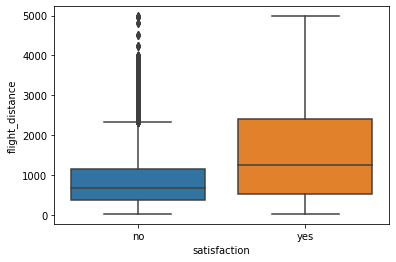

In [13]:
boxplot = sns.boxplot(y="flight_distance", x="satisfaction", data=df)
boxplot

<AxesSubplot:xlabel='satisfaction', ylabel='age'>

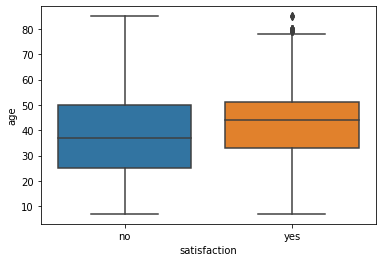

In [14]:
boxplot = sns.boxplot(y="age", x="satisfaction", data=df)
boxplot

<AxesSubplot:xlabel='departure_delay_in_minutes', ylabel='flight_distance'>

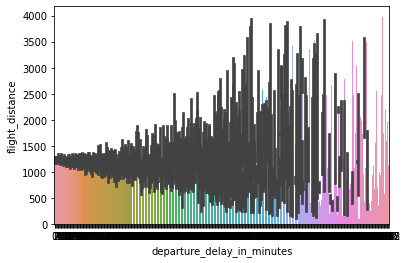

In [15]:
sns.barplot(data=df, x='departure_delay_in_minutes', y='flight_distance')


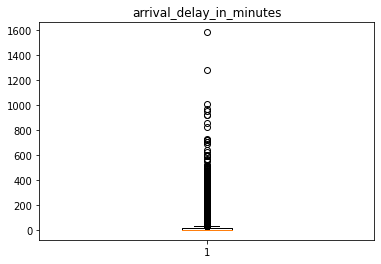

In [16]:
fig1, ax1 = plt.subplots()
ax1.set_title('arrival_delay_in_minutes')
ax1.boxplot(df['arrival_delay_in_minutes'])
plt.show()

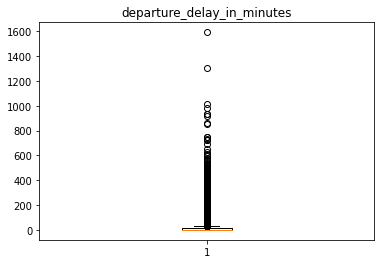

In [17]:
fig1, ax1 = plt.subplots()
ax1.set_title('departure_delay_in_minutes')
ax1.boxplot(df['departure_delay_in_minutes'])
plt.show()

In [18]:
from scipy.stats import skew
d = skew(df['departure_delay_in_minutes'])
print(d)
a = skew(df['arrival_delay_in_minutes'])
print(a)

6.733882295382029
6.605192370082042


<AxesSubplot:ylabel='Density'>

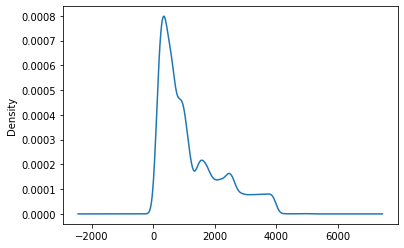

In [19]:
density = df["flight_distance"].plot.density()
density

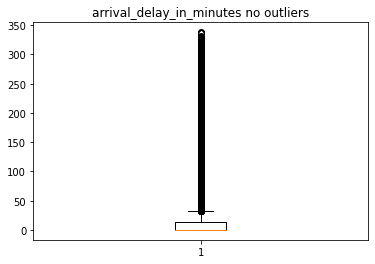

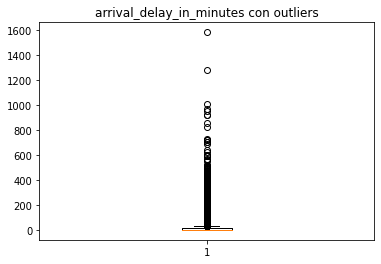

In [20]:
#Outliers
from scipy import stats  
# outliers
num_df = df.select_dtypes(include=["number"])
cat_df = df.select_dtypes(exclude=["number"])
#
idx = np.all(stats.zscore(num_df) < 3, axis=1)
#
dfc = pd.concat([num_df.loc[idx], cat_df.loc[idx]], axis=1)
#
Q1 = num_df.quantile(0.02)
Q3 = num_df.quantile(0.98)
IQR = Q3 - Q1
idx = ~((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).any(axis=1)
dfc = pd.concat([num_df.loc[idx], cat_df.loc[idx]], axis=1)
fig1, ax1= plt.subplots()
ax1.set_title('arrival_delay_in_minutes no outliers')
ax1.boxplot(dfc['arrival_delay_in_minutes'])
plt.show()
fig1, ax1 = plt.subplots()
ax1.set_title('arrival_delay_in_minutes con outliers')
ax1.boxplot(df['arrival_delay_in_minutes'])
plt.show()

## Preprocesamiento: Tratamiento de variables categóricas
Label Encoding

In [21]:
# Para las variables 'gender', 'customer_type', 'type_of_travel' y 'satisfaction'
categorical_columns = ['gender','customer_type', 'type_of_travel', 'satisfaction']
for i in range(len(categorical_columns)):
  df[categorical_columns[i]] = LabelEncoder(
  ).fit_transform(df[categorical_columns[i]])
df

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,checkin_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,1,0,13.0,1,Eco Plus,460,3,3,1,5,3,5,5,4,4,5,25,18.0,0
1,1,1,25.0,0,Business,235,3,3,3,1,3,1,1,1,1,1,1,6.0,0
2,0,0,26.0,0,Business,1142,2,2,2,5,5,5,5,4,4,5,0,0.0,1
3,0,0,25.0,0,Business,562,2,5,5,2,2,2,2,2,1,2,11,9.0,0
4,1,0,61.0,0,Business,214,3,3,3,4,5,5,3,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23.0,0,Eco,192,2,2,3,2,2,2,2,3,2,2,3,0.0,0
103900,1,0,49.0,0,Business,2347,4,4,4,2,4,5,5,5,5,4,0,0.0,1
103901,1,1,30.0,0,Business,1995,1,1,3,4,1,5,4,3,5,4,7,14.0,0
103902,0,1,22.0,0,Eco,1000,1,1,5,1,1,1,1,4,5,1,0,0.0,0


In [22]:
# Para la variable "class"
ohe = OneHotEncoder()

# como resultado, obtendremos n cantidad de nuevas columnas como tantas categorias existan en workclass
resultados_ohe = ohe.fit_transform(df[["class"]])

# creamos un nuevo dataframe con los datos obtenidos
resultados_ohe = pd.DataFrame(resultados_ohe.toarray(), columns=list(ohe.categories_)[0], dtype=np.int8)
resultados_ohe

,Business,Eco,Eco Plus
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
103899,0,1,0
103900,1,0,0
103901,1,0,0
103902,0,1,0


In [23]:
df = df.join(resultados_ohe)
df.drop("class", axis=1, inplace=True)
df

,gender,customer_type,age,type_of_travel,flight_distance,inflight_wifi_service,ease_of_online_booking,gate_location,food_and_drink,online_boarding,...,inflight_entertainment,on_board_service,checkin_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,Business,Eco,Eco Plus
0,1,0,13.0,1,460,3,3,1,5,3,...,5,4,4,5,25,18.0,0,0,0,1
1,1,1,25.0,0,235,3,3,3,1,3,...,1,1,1,1,1,6.0,0,1,0,0
2,0,0,26.0,0,1142,2,2,2,5,5,...,5,4,4,5,0,0.0,1,1,0,0
3,0,0,25.0,0,562,2,5,5,2,2,...,2,2,1,2,11,9.0,0,1,0,0
4,1,0,61.0,0,214,3,3,3,4,5,...,3,3,3,3,0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23.0,0,192,2,2,3,2,2,...,2,3,2,2,3,0.0,0,0,1,0
103900,1,0,49.0,0,2347,4,4,4,2,4,...,5,5,5,4,0,0.0,1,1,0,0
103901,1,1,30.0,0,1995,1,1,3,4,1,...,4,3,5,4,7,14.0,0,1,0,0
103902,0,1,22.0,0,1000,1,1,5,1,1,...,1,4,5,1,0,0.0,0,0,1,0


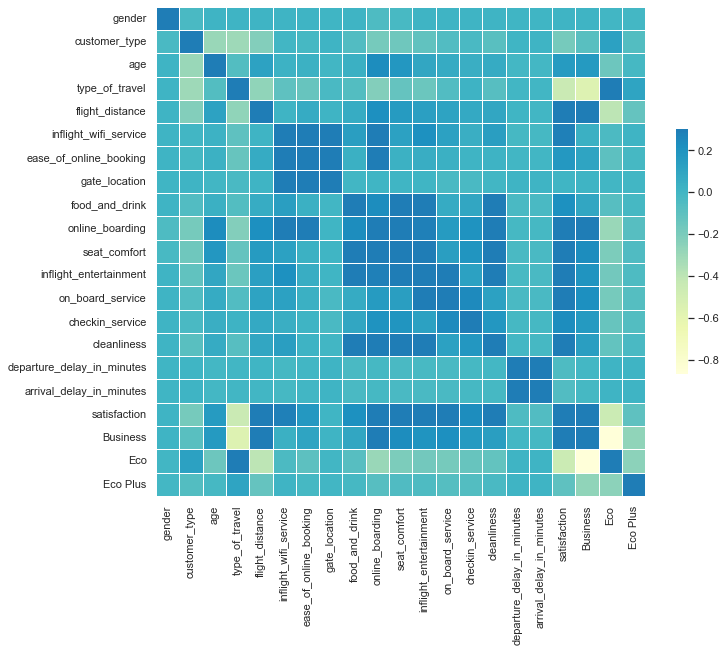

In [24]:
#Correlacion
corr= df.corr()
corr

sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap="YlGnBu", vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [25]:
corrSat = corr.sort_values(by=["satisfaction"], ascending=False)
corrList1 = corrSat["satisfaction"]
print(corrList1)
corrList = corrList1.index

satisfaction                  1.000000
Business                      0.503848
online_boarding               0.503557
inflight_entertainment        0.398059
seat_comfort                  0.349459
on_board_service              0.322383
cleanliness                   0.305198
flight_distance               0.298780
inflight_wifi_service         0.284245
checkin_service               0.236174
food_and_drink                0.209936
ease_of_online_booking        0.171705
age                           0.154706
gender                        0.012211
gate_location                 0.000682
departure_delay_in_minutes   -0.050494
arrival_delay_in_minutes     -0.057435
Eco Plus                     -0.105363
customer_type                -0.187638
type_of_travel               -0.449000
Eco                          -0.451118
Name: satisfaction, dtype: float64


inflight_wifi_service


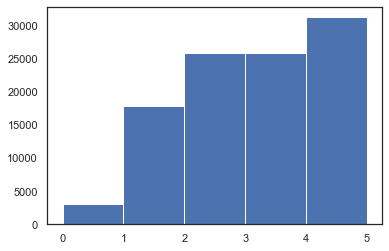

ease_of_online_booking


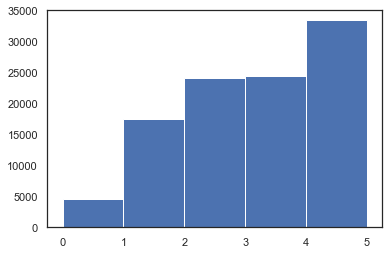

gate_location


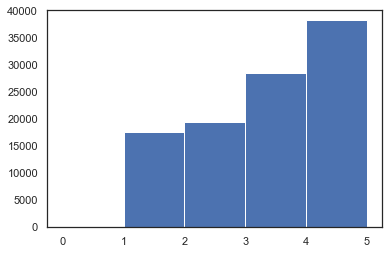

food_and_drink


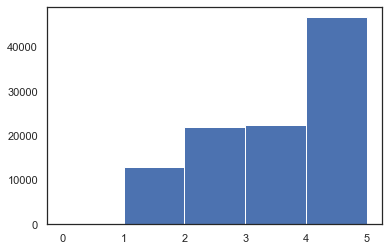

online_boarding


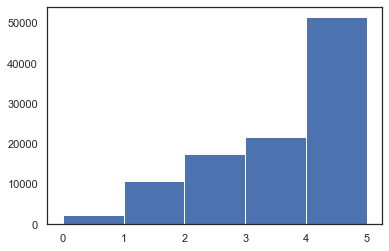

seat_comfort


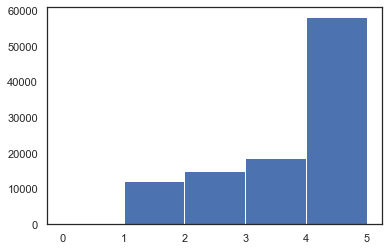

inflight_entertainment


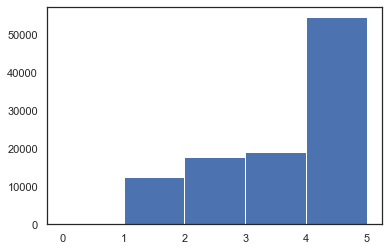

on_board_service


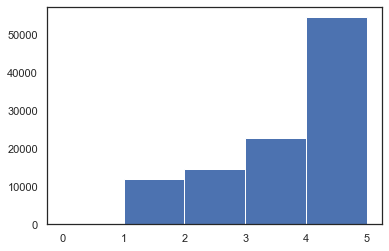

checkin_service


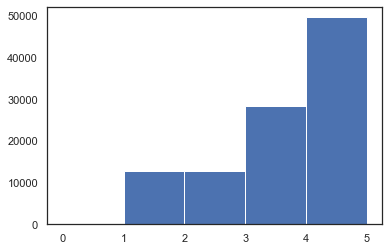

cleanliness


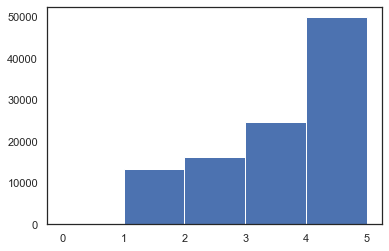

In [26]:
# Histograma de las categorías de la encuesta.
lista = corr.index
listaEncuesta = []
for i in range(10):
    listaEncuesta.append(lista[i+5])
listaEncuesta
for i in range(10):
    print(listaEncuesta[i])
    plt.hist(df[listaEncuesta[i]], bins=5)
    plt.show()

# Modelos de Machine Learning: Clasificación

In [27]:
# dividimos el conjunto de datos
from sklearn.preprocessing import MinMaxScaler
X = df.loc[:, df.columns != 'satisfaction']
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Estandarizamos los datos
sc = MinMaxScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Modelo KNN: k = 2
    Accuracy: 91.88
    Precision: 96.42
    Recall: 84.38
    F1-Score: 90.00


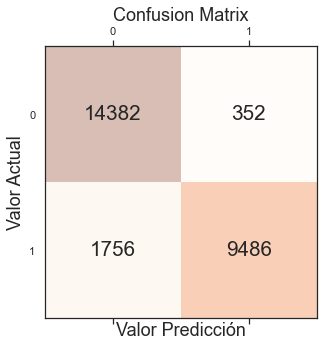


Modelo KNN: k = 3
    Accuracy: 93.03
    Precision: 93.69
    Recall: 89.96
    F1-Score: 91.79


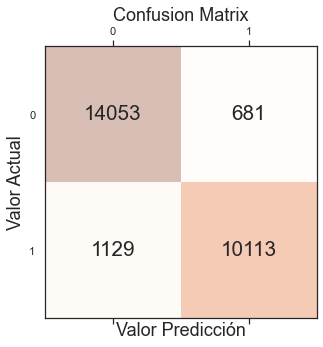


Modelo KNN: k = 4
    Accuracy: 92.68
    Precision: 96.02
    Recall: 86.67
    F1-Score: 91.11


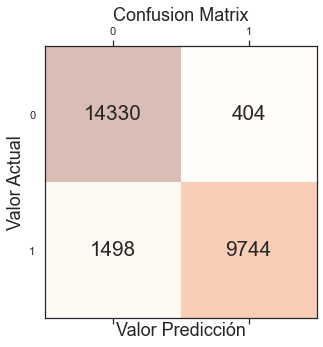


Modelo KNN: k = 5
    Accuracy: 93.13
    Precision: 94.15
    Recall: 89.71
    F1-Score: 91.87


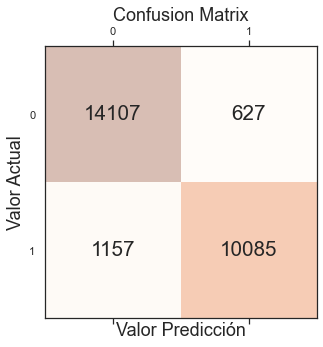


Modelo KNN: k = 6
    Accuracy: 92.83
    Precision: 95.60
    Recall: 87.46
    F1-Score: 91.35


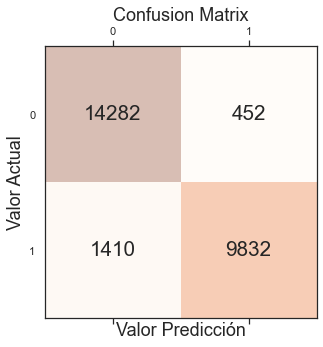


Modelo KNN: k = 7
    Accuracy: 93.12
    Precision: 94.32
    Recall: 89.49
    F1-Score: 91.84


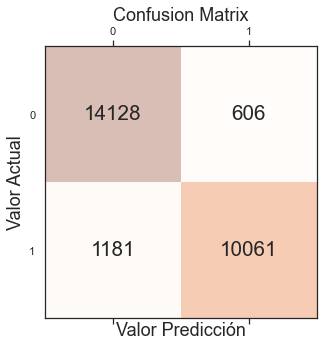

In [28]:
# Correr varios K
# algunos vecinos de ejemplo
k = [2, 3, 4, 5, 6, 7]

# iteramos
for vecino in k:
  # creamos el modelo para el k seleccionado
  clf = KNeighborsClassifier(n_neighbors = vecino)
  
  # lo ajustamos
  clf.fit(X_train_std, y_train)

  # hacemos las predicciones
  y_pred = clf.predict(X_test_std)

  # lo evaluamos y guardamos cada valor
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f"Modelo KNN: k = {vecino}")
  print(f"    Accuracy: {accuracy*100:.2f}")
  print(f"    Precision: {precision*100:.2f}")
  print(f"    Recall: {recall*100:.2f}")
  print(f"    F1-Score: {f1*100:.2f}")
  conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
  # graficamos
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
  
  plt.xlabel('Valor Predicción', fontsize=18)
  plt.ylabel('Valor Actual', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()
  print("")

###Árbol de decisión

In [29]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_std, y_train)
# hacemos las predicciones
tree_y_pred = tree.predict(X_test_std)

# lo evaluamos y guardamos cada valor
treeAccuracy = accuracy_score(y_test, tree_y_pred)
treePrecision = precision_score(y_test, tree_y_pred)
treeRecall = recall_score(y_test, tree_y_pred)
treef1 = f1_score(y_test, tree_y_pred)

### Random Forest

In [30]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_std, y_train)
# hacemos las predicciones
forest_y_pred = forest.predict(X_test_std)

# lo evaluamos y guardamos cada valor
forest_accuracy = accuracy_score(y_test, forest_y_pred)
forest_precision = precision_score(y_test, forest_y_pred)
forest_recall = recall_score(y_test, forest_y_pred)
forest_f1 = f1_score(y_test, forest_y_pred)

# Resultados:
Podemos comparar varios modelos y observar sus resultados

Modelo KNN con 5 vecinos
    Accuracy: 93.13
    Precision: 94.15
    Recall: 89.71
    F1-Score: 91.87


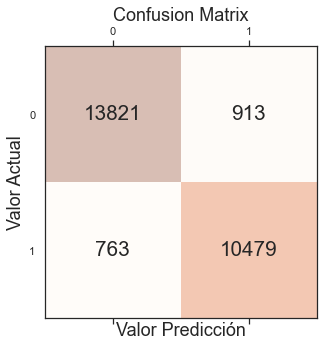


Modelo Arbol de Decisión
    Accuracy: 93.55
    Precision: 91.99
    Recall: 93.21
    F1-Score: 92.60


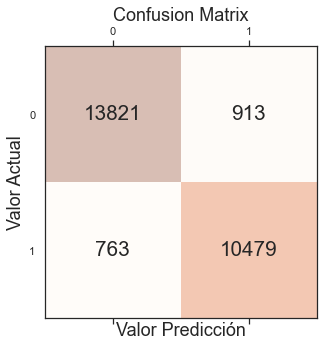

Modelo Random Forest
    Accuracy: 95.57
    Precision: 95.94
    Recall: 93.73
    F1-Score: 94.82


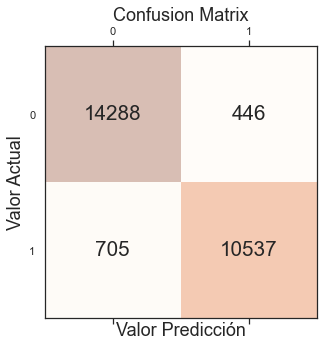

In [31]:
#KNN
# El mejor KNN fue con 5 vecinos
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train_std, y_train)
# hacemos las predicciones
knn_y_pred = knn5.predict(X_test_std)

# lo evaluamos y guardamos cada valor
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)


print(f"Modelo KNN con 5 vecinos")
print(f"    Accuracy: {knn_accuracy*100:.2f}")
print(f"    Precision: {knn_precision*100:.2f}")
print(f"    Recall: {knn_recall*100:.2f}")
print(f"    F1-Score: {knn_f1*100:.2f}")
tree_conf_matrix = confusion_matrix(y_true = y_test, y_pred = tree_y_pred)
# graficamos
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(tree_conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(tree_conf_matrix.shape[0]):
    for j in range(tree_conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=tree_conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Valor Predicción', fontsize=18)
plt.ylabel('Valor Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print("")

#ARBOL DE DECISION
print(f"Modelo Arbol de Decisión")
print(f"    Accuracy: {treeAccuracy*100:.2f}")
print(f"    Precision: {treePrecision*100:.2f}")
print(f"    Recall: {treeRecall*100:.2f}")
print(f"    F1-Score: {treef1*100:.2f}")
tree_conf_matrix = confusion_matrix(y_true = y_test, y_pred = tree_y_pred)
# graficamos
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(tree_conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(tree_conf_matrix.shape[0]):
    for j in range(tree_conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=tree_conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Valor Predicción', fontsize=18)
plt.ylabel('Valor Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#RANDOM FOREST
print(f"Modelo Random Forest")
print(f"    Accuracy: {forest_accuracy*100:.2f}")
print(f"    Precision: {forest_precision*100:.2f}")
print(f"    Recall: {forest_recall*100:.2f}")
print(f"    F1-Score: {forest_f1*100:.2f}")
forest_conf_matrix = confusion_matrix(y_true = y_test, y_pred = forest_y_pred)
# graficamos
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(forest_conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(forest_conf_matrix.shape[0]):
    for j in range(forest_conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=forest_conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Valor Predicción', fontsize=18)
plt.ylabel('Valor Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print("")

# Conclusion
Observamos que
- Vimos que la cantidad de outilers eran 200 (0,002%) con lo cual nos pareció que no era significante sacarlos.
- Observamos que el Random Forest es el modelo que mejor F1 score tiene, aunque los otros no se quedan detrás. Además tiene el mejor Accuracy
- La precision de KNN es mejor que el arbol de decisión, pero el arbol de decisión tiene un F1 score de aprox 1% mas alto.

#Próximos pasos:
- Podríamos analizar de droppear la columna de gate_location ya que tiene una correlación con satisfaction de 0,0006, bastante baja.